In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cs
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle
from sklearn import (cross_validation, feature_selection, pipeline,
                     preprocessing, linear_model, grid_search)
import pandas as pd
dataset = pd.read_csv('Data.csv')
dataset = dataset.drop(['id'], axis=1)
dataset.head()
target = 'diagnosis'
var = dataset.var().sort_values()

In [18]:
dataset.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
var

fractal_dimension_se            0.000007
smoothness_se                   0.000009
concave points_se               0.000038
fractal_dimension_mean          0.000050
symmetry_se                     0.000068
smoothness_mean                 0.000198
compactness_se                  0.000321
fractal_dimension_worst         0.000326
smoothness_worst                0.000521
symmetry_mean                   0.000752
concavity_se                    0.000911
concave points_mean             0.001506
compactness_mean                0.002789
symmetry_worst                  0.003828
concave points_worst            0.004321
concavity_mean                  0.006355
compactness_worst               0.024755
concavity_worst                 0.043524
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
radius_mean                    12.418920
texture_mean                   18.498909
radius_worst                   23.360224
texture_worst   

In [20]:
dataset = dataset[['area_worst','area_mean','texture_worst','radius_mean','perimeter_se',target]]

In [30]:
dataset.head()

,area_worst,area_mean,texture_worst,radius_mean,perimeter_se,diagnosis
0,2019.0,1001.0,17.33,17.99,8.589,M
1,1956.0,1326.0,23.41,20.57,3.398,M
2,1709.0,1203.0,25.53,19.69,4.585,M
3,567.7,386.1,26.50,11.42,3.445,M
4,1575.0,1297.0,16.67,20.29,5.438,M


In [31]:
sample = dataset[dataset[target] == 'M']
control = dataset[dataset[target] == 'B']
X_sample = sample.iloc[:, sample.columns != target].values
y_sample = sample.iloc[:, sample.columns ==target].values
X_control = control.iloc[:, control.columns != target].values
y_control = control.iloc[:, control.columns ==target].values
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size = 0.25, random_state = 0)
X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(X_control, y_control, test_size = 0.25, random_state = 0)

In [36]:
print(X_train_control.shape)
print(X_train_sample.shape)
print(np.vstack((X_train_sample,X_train_control)).shape)

(267, 5)
(159, 5)
(426, 5)


In [38]:
sc = StandardScaler()
sc.fit(np.vstack((X_train_sample,X_train_control)))
X_test_sample = sc.transform(X_test_sample)
X_test_control = sc.transform(X_test_control)
X_test_sample = sc.transform(X_train_sample)
X_train_control = sc.transform(X_train_control)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.vstack((X_train_control,X_train_sample)))
X_train_sample = pca.transform(X_train_sample)
X_train_control = pca.transform(X_train_control)
X_test_sample = pca.transform(X_test_sample)
X_test_control = pca.transform(X_test_control)

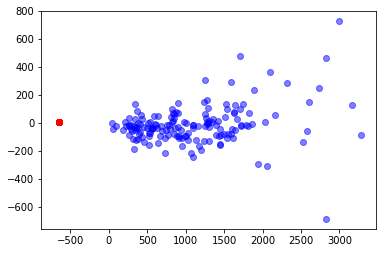

In [44]:
X_train_control = np.transpose(X_train_control)
X_train_sample = np.transpose(X_train_sample)
import matplotlib.pyplot as plt
plt.scatter(X_train_sample[0], X_train_sample[1], c='blue', alpha=0.5)
plt.scatter(X_train_control[0], X_train_control[1], c='red', alpha=0.5)
plt.show()